# CSCA 5632 Unsupervised Algorithms in ML - Final Exam

# True or Fake News Classification

### Project Overview

In this project, We'll build ML models to detect whether a news article is fake or real based on the content of the article using supervised and unsupervised learning algorithms. We'll aim to achieve the highest possible prediction accuracy score.

### About the Dataset

We will be using the  **[fake-and-real-news-dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)** which is available for download from Kaggle. The dataset is provided under the [Creative Commons 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

The dataset consists of two files:

- Fake.csv (23,502 fake news article)
- True.csv (21,417 true news article)

Dataset columns:

- Title: title of news article  
- Text: body text of news article  
- Subject: subject of news article  
- Date: publish date of news article

Summary of Tasks:
- Loading dataset
- Exploratory Data Analysis: 
    - Explore the dataset, perform data cleaning, data analysis, and text processing.
- Build and test models: 
    - Build, evaluate, and compare model's performances. 
    - Focus on unsupervised machine learning models.
- Conclusions: 
    - Summarize and discuss the results.

## Loading Dataset - Load Data from Files, Apply Lables and Merge Data

In [67]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile

def load_data_from_zip(zip_name, file_name):
    with  ZipFile(zip_name, 'r') as zip:
        with zip.open(file_name, 'r') as f:
            data = pd.read_csv(f)
    return data

df_fake = None
df_true = None

if os.path.exists('Fake.csv'):
    df_fake = pd.read_csv('Fake.csv')
elif os.path.exists('Fake.csv.zip'):
    df_fake = load_data_from_zip('Fake.csv.zip', 'Fake.csv')
else:
    print("File not found. Please download dataset and try again.")

if os.path.exists('True.csv'):
    df_true = pd.read_csv('True.csv')
elif os.path.exists('True.csv.zip'):
    df_true = load_data_from_zip('True.csv.zip', 'True.csv')
else:
    print("File not found. Please download dataset and try again.")


In [68]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [69]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


### Apply Labels

- 0: Fake news
- 1: True news

In [70]:
df_true['label'] = 1
df_fake['label'] = 0

### Merge Data

In [71]:
df = pd.concat([df_true, df_fake], ignore_index=True)

## Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

In this section, We'll explore the dataset, perform data cleaning, data analysis, and text processing.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [73]:
df.sample(5)

,title,text,subject,date,label
43125,BLACK TV HOST HAMMERS RACIST MOOCH: ‘The only ...,SPOT ON RACHEL ZONATION The Obamas pride thems...,left-news,"May 21, 2015",0
34376,TRUMP FALSELY ACCUSED OF ENCOURAGING Police to...,What Trump actually said was: Our police are a...,politics,"Sep 20, 2016",0
7577,"Factbox: Soda, sugar taxes across the United S...",(Reuters) - Voters in four U.S. cities will de...,politicsNews,"November 4, 2016",1
42674,AS JIHADI’S TIES TO ISIS Are Exposed…Obama’s D...,As one would expect the Obama regime is trippi...,left-news,"Dec 4, 2015",0
43318,A MUST READ: OBAMA’S TREASON GOES INTO OVERDRIVE,Our culture is what makes this Nation great an...,left-news,"Apr 6, 2015",0


### Remove Unused Columns

In [74]:
# Remove unused columns
unused_columns = ['title','subject','date']
df.drop(columns=unused_columns,inplace=True)

In [75]:
# Set pd's display.max_colwidth to 'None' so that we can see full content
pd.set_option('display.max_colwidth', None)
df.sample(5)

,text,label
25503,"Donald Trump just broke his biggest promise to his supporters in a BIGLY way.During his speech in Gettysburg, Pennsylvania on Saturday, the Republican nominee listed some of the things he plans to do in his first 100 days in office if he is elected to the presidency on November 8th.One of those things is a draconian anti-immigration policy that includes deporting millions of immigrants, whom Trump called criminals and killers, back to Mexico. He also said he would cut off funding to cities that give immigrants sanctuary.But his main point, as usual, was all about his damn wall along the Mexican border.Trump has repeatedly declared that Mexico will pay for this massive structure, which experts estimate will cost up to $25 billion.But during his speech, Trump changed his tune in a way that suggests America will actually be picking up the tab and merely hoping that Mexico will reimburse us for the cost. The End Illegal Immigration act fully funds the construction of a wall on our southern border, Trump said. Don t worry about it. Remember I said that Mexico is paying for the wall. However, he then added this remark. With the full understanding that the country of Mexico will be reimbursing the United States for the full cost of such a wall, okay? Here s the video via YouTube. Trump s remarks on the wall are at the 32:46 mark.In other words, America will be paying for Trump s wall if he becomes president, NOT Mexico.Because in order for there to even be a need for Mexico to reimburse us, it means America would have to pay for the wall first. And that means American taxpayers would be on the hook.But just like his insistence that Mexico will pay for the wall outright, Trump has no way of forcing Mexico to reimburse us either. So Trump just promised to INCREASE the national debt by billions of dollars within his first 100 days.In short, the central promise Trump made to his supporters has just gone up entirely in smoke.The question is are Trump s supporters too dumb to notice that their hero just admitted that he has been lying to them this whole time? Probably not.Featured Image: Screenshot",0
29181,"We know that Donald Trump appeals to what he calls the poorly educated just take a look around any of his rallies but there is a disturbing number of highly educated voters who are also backing the candidate whose platform includes building an 80 ft tall cement wall and tracking Muslim Americans in a database.One such couple, who describe themselves as affluent Americans with postgraduate degrees, wrote a letter to the Financial Times that lays out their support for Trump. It s as baffling as it is terrifying.Noting that they are socially liberal and fiscally mildly conservative, the couple, identified as Jon and Elsa Sands, say they are well aware of [Trump s] vulgarity and nous deficiency and yet are tempted to vote for him anyway.Electing the standard-bearer of the Democratic Party seems purposeless. The neanderthal Republicans barely respected the legitimacy of Bill Clinton s or Barack Obama s election, let alone that of Hillary who would arrive tainted with scandal and the email lapses hanging over her head. We would get four years of gridlock and hearings . The Republican tribunes, Ted Cruz and Marco Rubio, are backward, foolish and inexperienced. John Kasich, a moderate with extensive governmental experience and a willingness to compromise, is an also-ran.The logic, if it can be called that, is that Republicans in Congress won t let Democratic presidents do anything so you might as well go all-in on a Republican outsider like Trump. This seems to fly directly in the face of President Obama s actual accomplishments an ever-growing list that is proof that an intelligent, driven Democratic president can easily outsmart the Party of No if he puts his or her mind to it.No matter, say the Sands, they are going with Trump.That leaves The Donald, really a moderate in wolf s garb, who would owe nothing to either party 

In [76]:
# Reset pd's display max column width 
pd.set_option('display.max_colwidth', 50)

### Remove Duplicate Entries and Null Values

In [77]:
print(df.duplicated().sum())

6251


In [78]:
# drop duplicate entries
df.drop_duplicates(inplace=True)

In [79]:
# check null
df.isnull().sum()

text     0
label    0
dtype: int64

In [80]:
# reset index
df.reset_index(inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38647 entries, 0 to 38646
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   38647 non-null  int64 
 1   text    38647 non-null  object
 2   label   38647 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 905.9+ KB


### Data Distribution

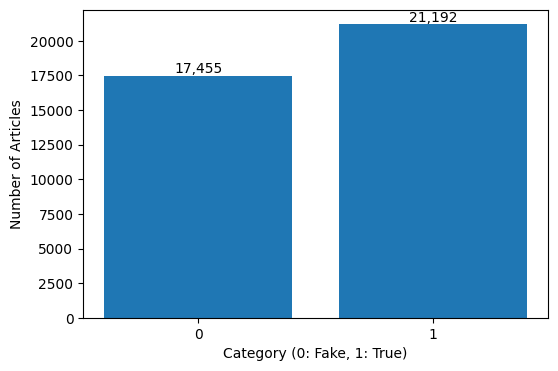

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display number of real/fake news
labels, counts = np.unique(df['label'], return_counts=True)
fig, ax = plt.subplots(figsize=(6, 4))
bar_container = ax.bar(labels, counts)
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set(xlabel='Category (0: Fake, 1: True)', ylabel='Number of Articles')
ax.set_xticks(labels)
plt.show()

### Text Processing

Text processing is the very first and most essential step in working with raw text data. Steps involving in this process usually include (but not limited to):
- Convert all capital letters to lower-case
- Remove URL
- Remove punctuation marks
- Remove numbers
- Remove stopwords
- Tokenization
- Text Normalization: Stemming, Lemmatization...

**Stemming** is the process of reducing infected words to their root word (stem). For example, 'runner', 'running', 'runs' 'ran' are all reduced to 'run'. Stemming does not consider the context. Hence it's fast, simple but less accurate than lemmatization.

**Lemmatization** is the process of reducing words to their base form (or lemma). This technique considers the context and meaning of the word. So it needs more time and computational resources but is more accurate than the stemming method.

We'll use Natural Language Toolkit (NLTK) library ([https://www.nltk.org](https://www.nltk.org)) for text processing, and we'll apply lemmatization technique. We'll also remove URLs, HTML tags, extra spaces, punctuations, numbers and so on from the news articles.

In [83]:
import nltk # Natural Language Toolkit
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re # python regrex
from string import punctuation
import time

class TextProcessing():
    def __init__(self):
        # create wordnet lemmatizer object
        self.lemmatizer = WordNetLemmatizer()
    
    def lemmatize(self, text):
        words = [self.lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stopwords.words('english')]
        words = [word for word in words if word not in punctuation]
        return ' '.join(words)
    
    def process_text(self, text):
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'<.*?>+', '', text)
        text = re.sub(r'\w*\d\w*', '', text)
        text = re.sub(r'[%s]' % re.escape(punctuation), '', text)
        text = re.sub(r'\n', '', text)
        return self.lemmatize(text)
    
begin_time = time.time()
tp = TextProcessing()
df['text'] = df['text'].apply(tp.process_text)
seconds = time.time() - begin_time
minutes = 0
if seconds > 59:
    minutes = seconds // 60
    seconds = seconds % 60

print(f"Text processing time: {minutes} minutes, {seconds:.2f} seconds")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dongnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text processing time: 21.0 minutes, 12.62 seconds


### Number of Words

In [84]:
# Add new column
df['wordcount'] = df['text'].apply(lambda s: len(s.split()))

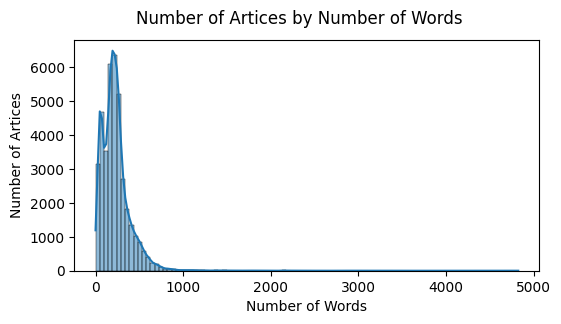

In [85]:
# Plot the Number of Artices by Number of Words
fig, ax = plt.subplots(figsize=(6, 3))
fig.suptitle('Number of Artices by Number of Words')
sns.histplot(df, x='wordcount', kde=True, bins=100, ax=ax)
ax.set(xlabel='Number of Words', ylabel="Number of Artices")
plt.show()

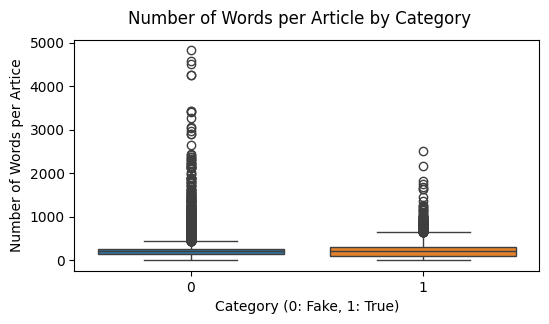

In [86]:
# Plot Number of Words per Article by Category
fig, ax = plt.subplots(figsize=(6, 3))
fig.suptitle('Number of Words per Article by Category')
sns.boxplot(ax=ax, data=df, x='label', y='wordcount', hue='label', legend=False)
ax.set(ylabel='Number of Words per Artice', xlabel='Category (0: Fake, 1: True)')
plt.show()

### Remove Outliers

In [87]:
df = df[df['wordcount']<=500]

In [88]:
df['label'].value_counts()

label
1    19523
0    16747
Name: count, dtype: int64

In [89]:
# reset index
df.reset_index(inplace=True)

## Unsupervised Learning (K-Means Clustering)

Let's start with K-Means Clustering, one of the fastest clustering algorithms. First, we'll train and test the model with different data subsets, then we'll try to improve the model's performance by tuning the hyperparameters.

### Helper Functions

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from itertools import permutations

#Convert text to TF-IDF matrix 
def text_to_tfidf(data, max_features=5000, min_df=2, max_df=0.95, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(
        max_features=max_features, 
        min_df=min_df, 
        max_df=max_df, 
        ngram_range=ngram_range, 
        stop_words='english')
    return vectorizer.fit_transform(data)

# Find best matching label ordering based on the accuracy
def label_permute_compare(y_true, yp, return_labels=True):
    ytrue_uniq = np.unique(y_true)
    p = list(permutations(range(len(ytrue_uniq))))
    best_score = 0.0
    best_order = None
    y_pred = []
    for pi in p:
        yp1 = [ytrue_uniq[pi[yp[i]]] for i in range(len(yp))]
        score = accuracy_score(y_true, yp1)
        if best_score < score:
            best_score = score
            best_order = pi
            y_pred = yp1
    if return_labels:
        return y_pred, best_score, best_order
    #else
    return best_score

# K-means custom scoring function
def kmeans_custom_score(model, X, y):
    return label_permute_compare(y, model.predict(X), return_labels=False)

# NMF custom scoring function
def nmf_custom_score(model, X, y):
    return label_permute_compare(y, np.argmax(model.transform(X), axis=1), return_labels=False)

# Display classification results
def display_model_result(y_true, y_pred, display_labels=None, display_report=True, plot_cm=True, figsize=(6, 3), cmap=plt.cm.Blues):
    if display_report:
        print('Classification report:')
        print(classification_report(y_true, y_pred))
    if plot_cm:
        cm_dsplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred), display_labels=display_labels)
        _, ax = plt.subplots(figsize=figsize)
        cm_dsplay.plot(ax=ax, cmap=cmap)
        ax.xaxis.tick_top()
        plt.show()

# Generate performance data
def generate_performance_data(train_sizes, train_results, test_results):
    perf_data = {
        'Train size': train_sizes,
        'Train accuracy': [result['accuracy'] for result in train_results],
        'Test accuracy': [result['accuracy'] for result in test_results],
        'Train precision (true)': [result['1']['precision'] for result in train_results],
        'Train precision (fake)': [result['0']['precision'] for result in train_results],
        'Test precision (true)': [result['1']['precision'] for result in test_results],
        'Test precision (fake)': [result['0']['precision'] for result in test_results],
        'Train recall (true)': [result['1']['recall'] for result in train_results],
        'Train recall (fake)': [result['0']['recall'] for result in train_results],
        'Test recall (true)': [result['1']['recall'] for result in test_results],
        'Test recall (fake)': [result['0']['recall'] for result in test_results],
        'Train f1-score (true)': [result['1']['f1-score'] for result in train_results],
        'Train f1-score (fake)': [result['0']['f1-score'] for result in train_results],
        'Test f1-score (true)': [result['1']['f1-score'] for result in test_results],
        'Test f1-score (fake)': [result['0']['f1-score'] for result in test_results]
    }
    return pd.DataFrame(perf_data)

# Plot model performance
def plot_model_performance(perf_df, ylim=(0.0,1.0)):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_xlabel("Percentage of training samples (%)")
    ax.set_xticks(perf_df['Train size'])
    ax.set(ylim=ylim)
    ax.set_ylabel("Accuracy score")
    ax.plot(perf_df['Train size'], perf_df['Train accuracy'], marker='o', label="Train score")
    ax.plot(perf_df['Train size'], perf_df['Test accuracy'], marker='o', label="Test score")
    ax.legend()
    plt.show() 

### Transform Data

To fit the model, we need to convert the raw text into numeric data. We'll use sklearn's **TfidfVectorizer** to tranfrom news content into a TF-IDF matrix and use the transformed data to train and test our model.

**Term Frequency-Inverse Document Frequency(TF-IDF)** is a simple measure of a word’s importance within a set of documents. It is commonly used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus). It combines two components: Term Frequency (TF) and Inverse Document Frequency (IDF).

**Term Frequency (TF):** The number of times a term occurs in a given document. 

**Inverse Document Frequency (IDF):** is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient).


In [91]:
X = text_to_tfidf(df['text'])
y = df['label']

### Train and Test K-Means Model

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Percentage of train subsets
train_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90]

kmeans_model = KMeans(n_clusters=2, max_iter=300, init='k-means++', n_init=2)

train_results = []
test_results = []
labels = [0, 1]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=42, stratify=y)
    # Train the model
    yp = kmeans_model.fit_predict(X_train)
    y_train_pred, train_accuracy, label_order = label_permute_compare(y_train.values, yp)
    train_results.append(classification_report(y_train, y_train_pred, output_dict=True))
    # Test the model
    yp = kmeans_model.predict(X_test)
    y_test_pred = [labels[label_order[yp[i]]] for i in range(len(yp))]
    test_results.append(classification_report(y_test, y_test_pred, output_dict=True))

# generate performance data
kmeans_perf_data = generate_performance_data(train_sizes, train_results, test_results)


In [93]:
kmeans_perf_data

,Train size,Train accuracy,Test accuracy,Train precision (true),Train precision (fake),Test precision (true),Test precision (fake),Train recall (true),Train recall (fake),Test recall (true),Test recall (fake),Train f1-score (true),Train f1-score (fake),Test f1-score (true),Test f1-score (fake)
0,10,0.688999,0.687008,0.676521,0.711524,0.674945,0.708817,0.808914,0.549254,0.807353,0.546709,0.736818,0.619946,0.735235,0.617298
1,20,0.689826,0.688896,0.676101,0.715068,0.676032,0.712288,0.813572,0.545536,0.810347,0.547320,0.738494,0.618902,0.737121,0.619001
2,30,0.692216,0.690811,0.677369,0.719759,0.676843,0.716490,0.817654,0.545979,0.814430,0.546703,0.740930,0.620939,0.739289,0.620186
3,40,0.689826,0.686426,0.673264,0.721718,0.670502,0.717192,0.823281,0.534259,0.820813,0.529757,0.740754,0.613999,0.738082,0.609388
4,50,0.683761,0.684257,0.669844,0.710032,0.670268,0.710627,0.813460,0.532545,0.813646,0.533437,0.734700,0.608613,0.735030,0.609413
5,60,0.692859,0.688172,0.677839,0.720735,0.673902,0.714794,0.818337,0.546576,0.815085,0.540230,0.741491,0.621689,0.737800,0.615372
6,70,0.686675,0.685323,0.671946,0.714530,0.669736,0.715401,0.816552,0.535273,0.819532,0.528861,0.737225,0.612046,0.737101,0.608148
7,80,0.689551,0.688448,0.675387,0.715788,0.672035,0.720178,0.814893,0.543439,0.822791,0.531801,0.738611,0.617819,0.739811,0.611817
8,90,0.687376,0.684588,0.673481,0.713222,0.670177,0.711891,0.813727,0.540074,0.815061,0.532537,0.736991,0.614688,0.735552,0.609290


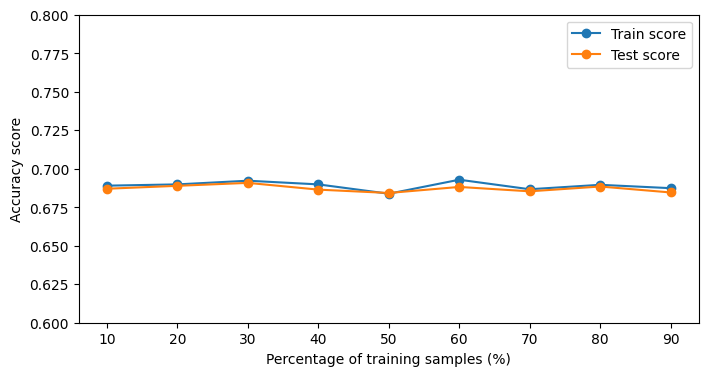

In [94]:
# plot model performance
plot_model_performance(kmeans_perf_data, ylim=(0.6,0.8))

### K-Means Hyperparameter Tuning

So far we have tried different subsets of the training and testing data. From the above graph we can see that the accuracy score is almost constant. Now we will tune the model's hyperparameters to see if we can improve the performance of the model. We will use sklearn's **GridSearchCV** to find the best hyperparameters.

Best Parameters: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 200}
Train result:
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     13398
           1       0.68      0.81      0.74     15618

    accuracy                           0.69     29016
   macro avg       0.70      0.68      0.68     29016
weighted avg       0.69      0.69      0.68     29016



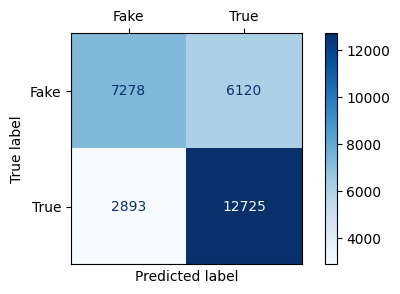

Test result:
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      3349
           1       0.67      0.82      0.74      3905

    accuracy                           0.69      7254
   macro avg       0.70      0.68      0.68      7254
weighted avg       0.69      0.69      0.68      7254



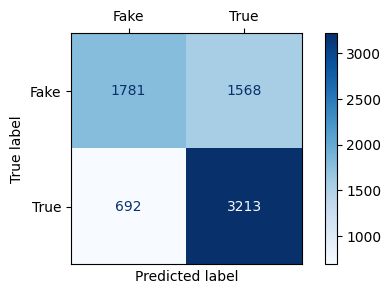

In [95]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

labels = [0,1]

kmeans_model = KMeans(n_clusters=2)

# K-Means hyper-parameters
param_grid = {
    'init': ['k-means++', 'random'],
    'max_iter': [200, 300, 500],
    'algorithm': ['lloyd', 'elkan']
}

# Perform Grid Search with cross validation
gridcv = GridSearchCV(kmeans_model, param_grid, cv=5, scoring=kmeans_custom_score, n_jobs=-1)
gridcv.fit(X_train, y_train)

print('Best Parameters:', gridcv.best_params_)

kmeans_model = gridcv.best_estimator_

# Train the model
yp = kmeans_model.fit_predict(X_train)
y_train_pred, train_accuracy, label_order = label_permute_compare(y_train.values, yp)
print("Train result:")
display_model_result(y_train, y_train_pred, display_labels=['Fake','True'])
# Test the model
yp = kmeans_model.predict(X_test)
y_test_pred = [labels[label_order[yp[i]]] for i in range(len(yp))]
print("Test result:")
display_model_result(y_test, y_test_pred, display_labels=['Fake','True'])

### Non-Negative Matrix Factorization (NMF)

NMF helps break down a large, non-negative matrix X into two smaller non-negative matrices (W and H) such that the product of W and H are approximately equal to X: $X \approx W*H$. The dimensions of W and H are chosen such that they capture the essential features of the data while reducing dimensionality.

In [96]:
from sklearn.decomposition import NMF

# Percentage of train subsets
train_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90]

nmf_model = NMF(n_components=2, init='nndsvda', solver='mu', random_state=42, beta_loss='kullback-leibler')

train_results = []
test_results = []
labels = [0, 1]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=42, stratify=y)
    # Train the model
    W = nmf_model.fit_transform(X_train)
    yp = np.argmax(W, axis=1)
    y_train_pred, train_accuracy, label_order = label_permute_compare(y_train.values, yp)
    train_results.append(classification_report(y_train, y_train_pred, output_dict=True))
    # Test the model
    W = nmf_model.transform(X_test)
    yp = np.argmax(W, axis=1)
    y_test_pred = [labels[label_order[yp[i]]] for i in range(len(yp))]
    test_results.append(classification_report(y_test, y_test_pred, output_dict=True))

# generate performance data
nmf_perf_data = generate_performance_data(train_sizes, train_results, test_results)

In [97]:
# Display model's results
nmf_perf_data

,Train size,Train accuracy,Test accuracy,Train precision (true),Train precision (fake),Test precision (true),Test precision (fake),Train recall (true),Train recall (fake),Test recall (true),Test recall (fake),Train f1-score (true),Train f1-score (fake),Test f1-score (true),Test f1-score (fake)
0,10,0.779983,0.778942,0.933835,0.690901,0.933372,0.689795,0.636270,0.947463,0.634625,0.947187,0.756856,0.799094,0.755539,0.798255
1,20,0.782741,0.781431,0.928282,0.695480,0.935166,0.692178,0.646351,0.941774,0.638174,0.948425,0.762077,0.800101,0.758639,0.800290
2,30,0.785222,0.784474,0.932432,0.697254,0.932904,0.696264,0.647943,0.945263,0.646056,0.945833,0.764581,0.802535,0.763424,0.802083
3,40,0.785773,0.785865,0.932793,0.697808,0.932230,0.698059,0.648739,0.945514,0.649394,0.944964,0.765257,0.802992,0.765523,0.802960
4,50,0.784836,0.784615,0.931771,0.696978,0.932870,0.696447,0.647716,0.944703,0.646348,0.945785,0.764201,0.802150,0.763617,0.802188
5,60,0.786095,0.784395,0.931849,0.698433,0.933025,0.696144,0.650162,0.944566,0.645793,0.945962,0.765927,0.803063,0.763281,0.802050
6,70,0.785892,0.784395,0.932339,0.698066,0.932070,0.696392,0.649349,0.945065,0.646577,0.945064,0.765528,0.803001,0.763508,0.801892
7,80,0.785670,0.785636,0.933253,0.697562,0.930088,0.698364,0.648162,0.945962,0.650704,0.942968,0.765010,0.802990,0.765707,0.802439
8,90,0.782373,0.776675,0.933058,0.693793,0.926119,0.689112,0.641739,0.946324,0.635758,0.940896,0.760453,0.800617,0.753949,0.795558


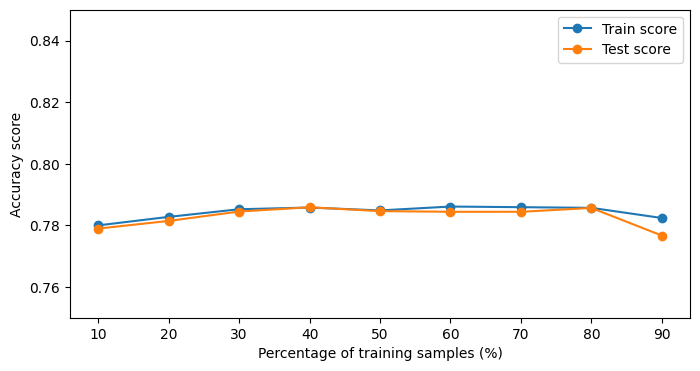

In [98]:
# Plot model performance
plot_model_performance(nmf_perf_data, ylim=(0.75,0.85))

**Observations**: The performance is almost flat. NMF quickly achieves accurary score 0.8 with just 10% of training samples. However, adding more data to train the model won't help much.

### NMF Hyperparameter Tuning


Best Parameters: {'alpha_W': 0.0, 'beta_loss': 'frobenius'}
Train result:
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79     11723
           1       0.88      0.70      0.78     13666

    accuracy                           0.79     25389
   macro avg       0.80      0.79      0.79     25389
weighted avg       0.80      0.79      0.79     25389



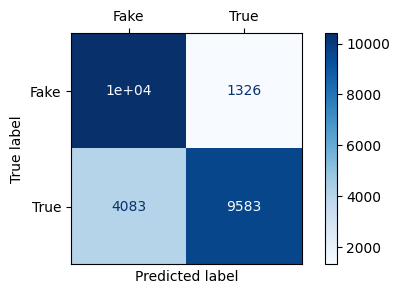

Test result:
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      5024
           1       0.88      0.71      0.79      5857

    accuracy                           0.79     10881
   macro avg       0.80      0.80      0.79     10881
weighted avg       0.81      0.79      0.79     10881



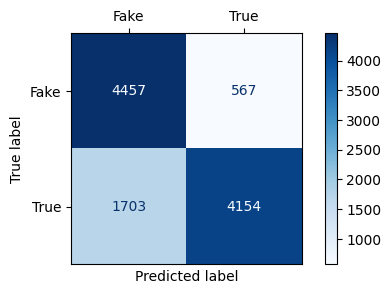

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

nmf_model = NMF(n_components=2, solver='mu', init='nndsvda', max_iter=300)

# NMF hyper-parameters
param_grid = {
    'alpha_W': [0.0, 0.1, 0.5],
    'beta_loss': ['kullback-leibler', 'frobenius'],
}

# Perform Grid Search with cross validation
gridcv = GridSearchCV(nmf_model, param_grid, cv=3, scoring=nmf_custom_score, n_jobs=-1)
gridcv.fit(X_train, y_train)

print('Best Parameters:', gridcv.best_params_)

nmf_model = gridcv.best_estimator_

# Train the model
W = nmf_model.fit_transform(X_train)
yp = np.argmax(W, axis=1)
y_train_pred, train_accuracy, label_order = label_permute_compare(y_train.values, yp)
print("Train result:")
display_model_result(y_train, y_train_pred, display_labels=['Fake','True'])

# Test the model
W = nmf_model.transform(X_test)
yp = np.argmax(W, axis=1)
y_test_pred = [labels[label_order[yp[i]]] for i in range(len(yp))]
print("Test result:")
display_model_result(y_test, y_test_pred, display_labels=['Fake','True'])


## Supervised Models (Logistic Regression)

In [100]:
from sklearn.linear_model import LogisticRegression

# Percentage of train subsets
train_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90]

lr_model = LogisticRegression(max_iter=200)

train_results = []
test_results = []
labels = [0, 1]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=42, stratify=y)
    # Train the model
    lr_model.fit(X_train, y_train)
    y_train_pred = lr_model.predict(X_train)
    train_results.append(classification_report(y_train, y_train_pred, output_dict=True))
    # Test the model
    y_test_pred = lr_model.predict(X_test)
    test_results.append(classification_report(y_test, y_test_pred, output_dict=True))

# generate performance data
lr_perf_data = generate_performance_data(train_sizes, train_results, test_results)

In [101]:
lr_perf_data

,Train size,Train accuracy,Test accuracy,Train precision (true),Train precision (fake),Test precision (true),Test precision (fake),Train recall (true),Train recall (fake),Test recall (true),Test recall (fake),Train f1-score (true),Train f1-score (fake),Test f1-score (true),Test f1-score (fake)
0,10,0.986490,0.970101,0.983240,0.990350,0.963315,0.978349,0.991803,0.980299,0.981845,0.956409,0.987503,0.985299,0.972492,0.967255
1,20,0.987042,0.977426,0.984244,0.990359,0.972168,0.983752,0.991805,0.981487,0.986298,0.967085,0.988010,0.985903,0.979182,0.975347
2,30,0.987685,0.980228,0.985247,0.990570,0.975372,0.986052,0.991975,0.982683,0.988219,0.970912,0.988600,0.986611,0.981753,0.978423
3,40,0.988420,0.981619,0.986254,0.990979,0.977223,0.986879,0.992317,0.983878,0.988902,0.973129,0.989276,0.987416,0.983028,0.979956
4,50,0.988144,0.982685,0.985260,0.991564,0.978911,0.987186,0.992829,0.982682,0.989140,0.975161,0.989030,0.987103,0.983999,0.981137
5,60,0.989385,0.984009,0.987104,0.992080,0.981324,0.987193,0.993256,0.984873,0.989115,0.978056,0.990171,0.988463,0.985204,0.982603
6,70,0.990153,0.984285,0.987642,0.993123,0.981701,0.987347,0.994146,0.985499,0.989244,0.978503,0.990883,0.989296,0.985458,0.982905
7,80,0.990385,0.985250,0.987665,0.993604,0.981735,0.989432,0.994558,0.985520,0.991037,0.978501,0.991099,0.989545,0.986364,0.983936
8,90,0.990320,0.987593,0.987788,0.993314,0.985736,0.989784,0.994309,0.985669,0.991291,0.983284,0.991037,0.989476,0.988506,0.986523


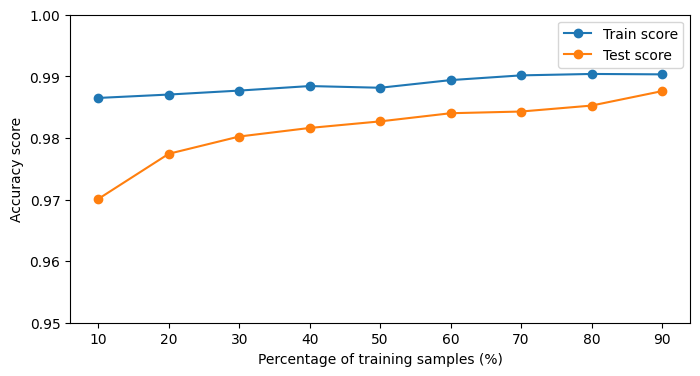

In [102]:
# Plot model performance
plot_model_performance(lr_perf_data, ylim=(0.95,1.0))

## Performance Comparison (K-Means vs NMF vs Linear Regression)

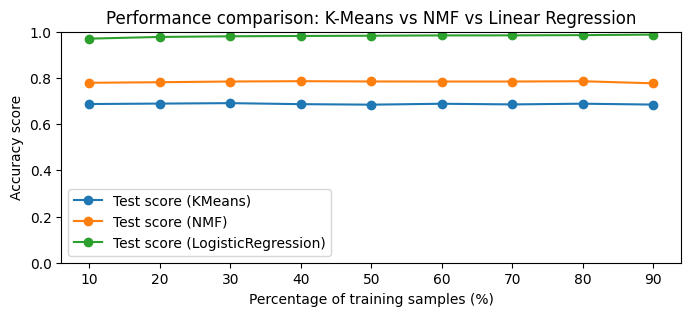

In [103]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_xlabel("Percentage of training samples (%)")
ax.set_xticks(lr_perf_data['Train size'])
ax.set(ylim=(0.0, 1.0))
ax.set_ylabel("Accuracy score")
ax.plot(kmeans_perf_data['Train size'], kmeans_perf_data['Test accuracy'], marker='o', label="Test score (KMeans)")
ax.plot(nmf_perf_data['Train size'], nmf_perf_data['Test accuracy'], marker='o', label="Test score (NMF)")
ax.plot(lr_perf_data['Train size'], lr_perf_data['Test accuracy'], marker='o', label="Test score (LogisticRegression)")
ax.legend()
plt.title("Performance comparison: K-Means vs NMF vs Linear Regression")
plt.show() 

## Summary
- Linear Regression is the winner in this test, both in terms of speed and accuracy. It achieves the highest accuracy score (0.985) on the test set when trained on 90% of the data. K-Means' best accuracy score on the test set is 0.69. NMF's best accuracy score on the test set is 0.80.
- NMF can classify 80% accurately without knowing or training with labels. While K-Means is much faster than NMF, it is less accurate. It is known to be one of the machine learning models that suffers the most from high dimensional data.
- Comparing supervised learning model (Linear Regression) with unsupervised learning model (K-Means/NMF), Linear Regression performs much better in this test. There is no doubt that supervised learning outperforms unsupervised learning models because they're trained with labels while unsupervised models are not.

### Project's GitHub Repository

This notebook is available here: [https://github.com/dongndp/csca-5632](https://github.com/dongndp/csca-5632).

### References

1. [NLTK - Natural Language Toolkit](https://www.nltk.org)

2. [Non-Negative Matrix Factorization (NMF)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF)

3. [Stemming vs Lemmatization in NLP: Must-Know Differences](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/)

4. [Top 14 Steps To Build A Complete NLTK Preprocessing Pipeline In Python](https://spotintelligence.com/2022/12/21/nltk-preprocessing-pipeline/)

5. [Understanding TF-IDF (Term Frequency-Inverse Document Frequency)](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)

6. [Non-Negative Matrix Factorization Explained & Practical How To Guide In Python](https://spotintelligence.com/2023/09/08/non-negative-matrix-factorization/amp/)